# Iris Classification

## Model evaluation

Many metrics can be used to determine the quality of a classification model.

Evaluation should be decided based on test data performance. However, stats on the training data may also be helpful for determining under or over fitting.

This notebook will run metrics on both datasets, but **test metrics** are the primary focus to evaluate model generalizability.

In [1]:
import os
import pandas as pd
import seaborn as sns
from joblib import load

In [2]:
data_path = os.path.join('..', 'data')
# training data
X_train_path = os.path.join(data_path, 'X_train.csv')
y_train_path = os.path.join(data_path, 'y_train.csv')
# test data
X_test_path = os.path.join(data_path, 'X_test.csv')
y_test_path = os.path.join(data_path, 'y_test.csv')

In [3]:
X_train = pd.read_csv(X_train_path)
y_train = pd.read_csv(y_train_path)

X_test = pd.read_csv(X_test_path)
y_test = pd.read_csv(y_test_path)

In [4]:
models_path = os.path.join('..', 'models')

In [5]:
lr_model_path = os.path.join(models_path, 'lr.pkl')
lr = load(lr_model_path)
lr_train_preds = lr.predict(X_train)
lr_test_preds = lr.predict(X_test)

In [6]:
lr_test_preds

array([1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1,
       0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0,
       2, 1, 2, 1, 1, 2])

In [7]:
rf_model_path = os.path.join(models_path, 'rf.pkl')
rf = load(rf_model_path)
rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)

In [8]:
rf_test_preds

array([1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 2, 1,
       0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0,
       1, 1, 2, 1, 1, 2])

In [9]:
images_path = os.path.join('..', 'images')
os.makedirs(images_path, exist_ok=True)

lr_train_cm_path = os.path.join(images_path, 'lr_train_cm.png')
rf_train_cm_path = os.path.join(images_path, 'rf_train_cm.png')

lr_test_cm_path = os.path.join(images_path, 'lr_test_cm.png')
rf_test_cm_path = os.path.join(images_path, 'rf_test_cm.png')

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [11]:
# create list of preds and paths
true_list = [y_train, y_test, y_train, y_test]
pred_list = [lr_train_preds, lr_test_preds, rf_train_preds, rf_test_preds]
path_list = [lr_train_cm_path, lr_test_cm_path, rf_train_cm_path, rf_test_cm_path]

Saving image to path: ../images/lr_train_cm.png.
Saving image to path: ../images/lr_test_cm.png.
Saving image to path: ../images/rf_train_cm.png.
Saving image to path: ../images/rf_test_cm.png.


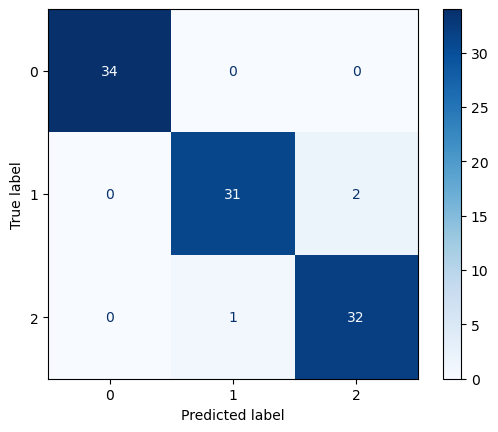

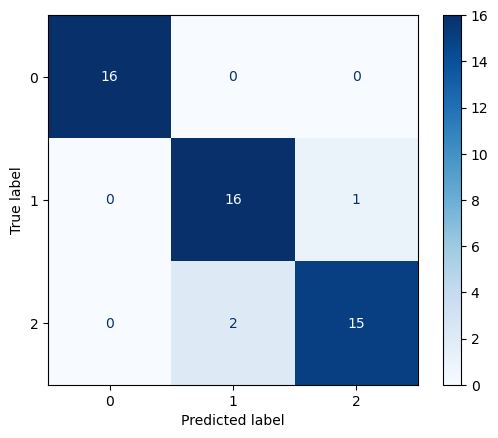

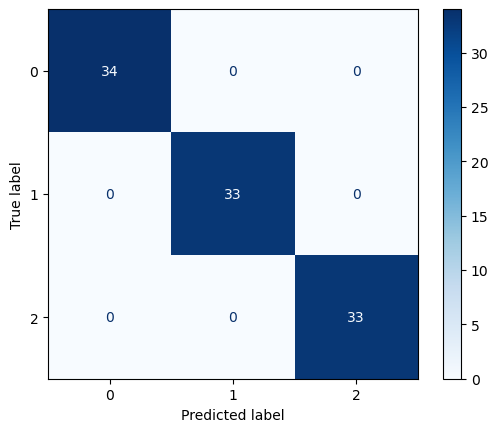

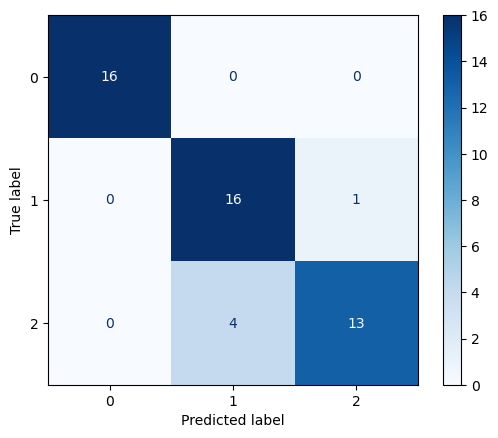

In [12]:
for trues, preds, path in zip(true_list, pred_list, path_list):
    cm_disp = ConfusionMatrixDisplay.from_predictions(y_true=trues, y_pred=preds, cmap='Blues')
    print(f'Saving image to path: {path}.')
    cm_disp.figure_.savefig(path)

In [13]:
print(f'Logistic Regression Accuracy Score: {accuracy_score(y_test.target, lr_preds): .2f} ')
print(f'Random Forest Accuracy Score: {accuracy_score(y_test.target, rf_preds): .2f} ')

NameError: name 'lr_preds' is not defined

In [ ]:
print(classification_report(y_test.target, lr_preds))

In [ ]:
print(classification_report(y_test.target, rf_preds))